# Diabetes prediction competition by Kaagle
### Goal: train a machine learning model to predict the probability of diabtetes.  

In [3]:
# import train dataset
import pandas as pd
train_df = pd.read_csv('/content/train.csv')
if not train_df.empty:
  print("dataset loaded successfully!")
else:
  print("failed to load dataset.")

dataset loaded successfully!


In [4]:
# print dataset rows to review
print(train_df.head())

   id  age  alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0   0   31                             1                                  45   
1   1   50                             2                                  73   
2   2   32                             3                                 158   
3   3   54                             3                                  77   
4   4   54                             1                                  55   

   diet_score  sleep_hours_per_day  screen_time_hours_per_day   bmi  \
0         7.7                  6.8                        6.1  33.4   
1         5.7                  6.5                        5.8  23.8   
2         8.5                  7.4                        9.1  24.1   
3         4.6                  7.0                        9.2  26.6   
4         5.7                  6.2                        5.1  28.8   

   waist_to_hip_ratio  systolic_bp  ...  gender  ethnicity  education_level  \
0            

In [6]:
print(train_df.describe())

                  id            age  alcohol_consumption_per_week  \
count  700000.000000  700000.000000                 700000.000000   
mean   349999.500000      50.359734                      2.072411   
std    202072.738554      11.655520                      1.048189   
min         0.000000      19.000000                      1.000000   
25%    174999.750000      42.000000                      1.000000   
50%    349999.500000      50.000000                      2.000000   
75%    524999.250000      58.000000                      3.000000   
max    699999.000000      89.000000                      9.000000   

       physical_activity_minutes_per_week     diet_score  sleep_hours_per_day  \
count                       700000.000000  700000.000000        700000.000000   
mean                            80.230803       5.963695             7.002200   
std                             51.195071       1.463336             0.901907   
min                              1.000000       0.1000

In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [8]:
# print the shape
print(train_df.shape)
# null values
print("null values:", train_df.isnull().sum())
print("\ntotal null values: ", train_df.isnull().sum().sum())
print("\nTotal duplicate values: ", train_df.duplicated().sum())

(700000, 26)
null values: id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular

In [10]:
print("education level:\n", train_df['education_level'].value_counts())


education level:
 education_level
Highschool      344145
Graduate        261268
Postgraduate     79642
No formal        14945
Name: count, dtype: int64


In [11]:
print(train_df['income_level'].value_counts())

income_level
Middle          290557
Lower-Middle    178570
Upper-Middle    127836
Low              85803
High             17234
Name: count, dtype: int64


In [12]:
print(train_df['employment_status'].value_counts(sort=True, ascending=False))

employment_status
Employed      516170
Retired       115735
Unemployed     49787
Student        18308
Name: count, dtype: int64


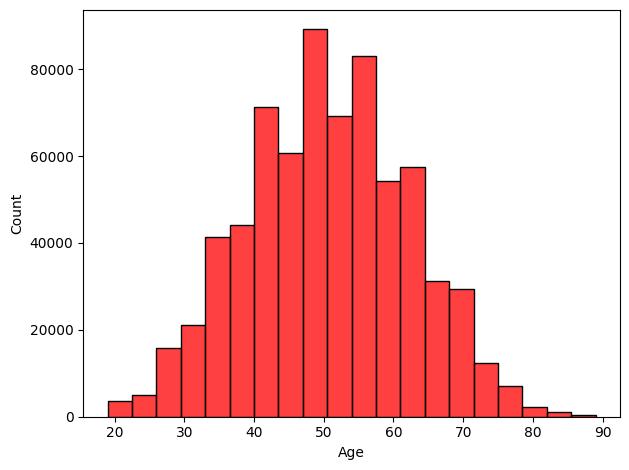

In [14]:
# histogram of age
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train_df['age'], color='red', bins=20)
plt.xlabel("Age")
plt.tight_layout()
plt.show()

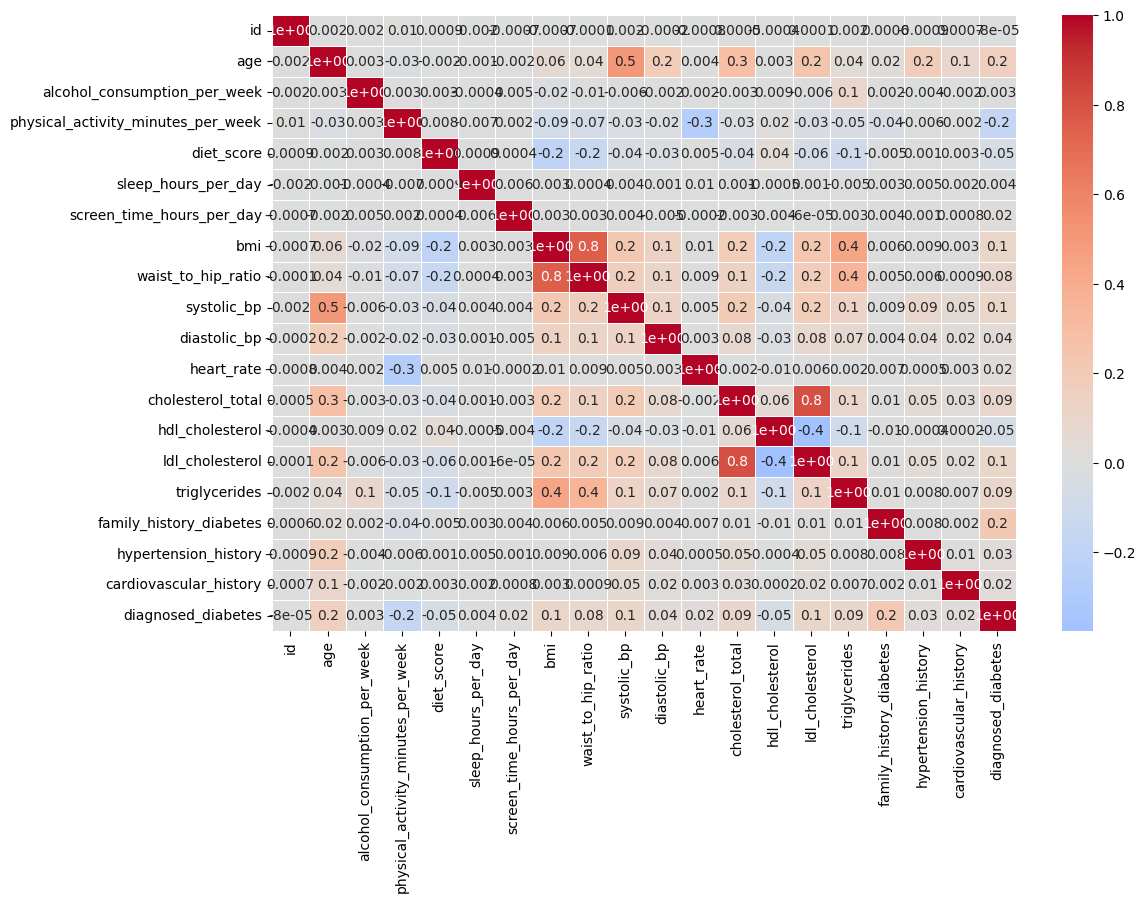

In [18]:
# plot the heatmap for corraltion
plt.figure(figsize=(12,8))
sns.heatmap(data=train_df.drop(labels=['gender','ethnicity','education_level', 'income_level', 'smoking_status', 'employment_status'], axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.1', center=0)
plt.show()


In [25]:
# alcohol consumption by employment status
alcohol_cons_by_emp_status = train_df.groupby('employment_status')['alcohol_consumption_per_week'].mean().reset_index()
alcohol_cons_by_emp_status = alcohol_cons_by_emp_status.sort_values(ascending=False, by='alcohol_consumption_per_week')
print(alcohol_cons_by_emp_status)

alcohol_cons_by_income_level = train_df.groupby('income_level')['alcohol_consumption_per_week'].mean().reset_index()
alcohol_cons_by_income_level = alcohol_cons_by_income_level.sort_values(ascending=False, by='alcohol_consumption_per_week')
print("\n", alcohol_cons_by_income_level)

  employment_status  alcohol_consumption_per_week
2           Student                      2.090889
3        Unemployed                      2.083857
0          Employed                      2.071521
1           Retired                      2.068536

    income_level  alcohol_consumption_per_week
3        Middle                      2.078532
2  Lower-Middle                      2.072145
1           Low                      2.065825
4  Upper-Middle                      2.065545
0          High                      2.055704


In [30]:
smoking_status_count = train_df['smoking_status'].value_counts()
print(smoking_status_count)

smoking_status
Never      494448
Current    103363
Former     102189
Name: count, dtype: int64


In [33]:
# import necessary sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [34]:
# prepare labels and features from train dataset
# features
x = train_df.drop(labels='diagnosed_diabetes', axis=1)
# label
y = train_df['diagnosed_diabetes']

# shape
print("features: ", x.shape)
print("labels: ", y.shape)

# null values:
print("labels null values: ", y.isnull().sum().sum())
print("features null values: ", x.isnull().sum().sum())

features:  (700000, 25)
labels:  (700000,)
labels null values:  0
features null values:  0


In [36]:
# categorical columns from the train dataset
categorical_cols = []
# numerical columns
numerical_cols = []
for col in x.columns:
  if train_df[col].dtype == 'object':
    categorical_cols.append(col)
  else:
    numerical_cols.append(col)

print("categorical cols: \n", categorical_cols)
print("numerical cols: \n", numerical_cols)


categorical cols: 
 ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
numerical cols: 
 ['id', 'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']


In [37]:
# split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)
print("train shape: ", x_train.shape)
print("test shape: ", x_test.shape)

train shape:  (560000, 25)
test shape:  (140000, 25)


In [41]:
# preprocessing and pipeline
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

numerical_transfromer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transfromer, numerical_cols)
    ],
    verbose=True,
    n_jobs=-1
)

In [42]:
# random forest model pipeline
rf_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(
            random_state=42,
            n_jobs=-1,
            criterion='gini',
            n_estimators=100,
            max_depth=10,
            min_samples_split=2,
        ))
    ]
)

In [43]:
# Decision tree pipeline
dt_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('tree', DecisionTreeClassifier(
            random_state=42,
            criterion='gini',
            max_depth=10,
            splitter='best',
            min_samples_split=2
        ))
    ]
)

In [48]:
# logistic regression pipeline
lr_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('linear', LogisticRegression(random_state=42, max_iter=1000, solver='liblinear'))
    ]
)

In [49]:
from xgboost import XGBClassifier
# xgb model pipeline
xgb_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('xgb', XGBClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_depth=5))
    ]
)

In [50]:
# fit the model random forest
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ethnicity',
                                                   'education_level',
                                                   'income_level',
                                                   'smoking_status',
                                                   'employment_status']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('sc...
                                                   'sleep_hours_per_day',
                                                   'screen_time_hours_per_day',
                                                   'bmi', 'waist_to_hip_ratio',
                                                   'systolic_bp',
                                                   'diastolic_bp', 'heart_rate',
                                                   'cholesterol_total',
                                                   'hdl_cholesterol',
                                                   'ldl_cholesterol',
                                                   'triglycerides',
                                                   'family_history_diabetes',
                                                   'hypertension_history',
                                                   'cardiovascular_history'])],
                                   verbose=True)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_jobs=-1,
                                        random_state=42))])

In [53]:
# fit xgb model
xgb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ethnicity',
                                                   'education_level',
                                                   'income_level',
                                                   'smoking_status',
                                                   'employment_status']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('sc...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [55]:
# fit logistic regression model
lr_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ethnicity',
                                                   'education_level',
                                                   'income_level',
                                                   'smoking_status',
                                                   'employment_status']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('sc...
                                                   'sleep_hours_per_day',
                                                   'screen_time_hours_per_day',
                                                   'bmi', 'waist_to_hip_ratio',
                                                   'systolic_bp',
                                                   'diastolic_bp', 'heart_rate',
                                                   'cholesterol_total',
                                                   'hdl_cholesterol',
                                                   'ldl_cholesterol',
                                                   'triglycerides',
                                                   'family_history_diabetes',
                                                   'hypertension_history',
                                                   'cardiovascular_history'])],
                                   verbose=True)),
                ('linear',
                 LogisticRegression(max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [54]:
# fit decision tree model
dt_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ethnicity',
                                                   'education_level',
                                                   'income_level',
                                                   'smoking_status',
                                                   'employment_status']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('sc...
                                                   'diet_score',
                                                   'sleep_hours_per_day',
                                                   'screen_time_hours_per_day',
                                                   'bmi', 'waist_to_hip_ratio',
                                                   'systolic_bp',
                                                   'diastolic_bp', 'heart_rate',
                                                   'cholesterol_total',
                                                   'hdl_cholesterol',
                                                   'ldl_cholesterol',
                                                   'triglycerides',
                                                   'family_history_diabetes',
                                                   'hypertension_history',
                                                   'cardiovascular_history'])],
                                   verbose=True)),
                ('tree',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [52]:
# calculate accurcay
def cal_accuracy(model, x_test, y_test):
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [51]:
import joblib
joblib.dump(rf_pipeline, 'rf_pipeline.pkl')
print("model saved")

model saved


In [56]:
# accuracy of rf model
rf_accuracy = cal_accuracy(rf_pipeline, x_test, y_test)
print("random forest accuracy: ", rf_accuracy)

xgb_accuracy = cal_accuracy(xgb_pipeline, x_test, y_test)
print("\nxgboost accuracy: ", xgb_accuracy)

lr_accuracy = cal_accuracy(lr_pipeline, x_test, y_test)
print("\nlogistic regression accuracy: ", lr_accuracy)

dt_accuracy = cal_accuracy(dt_pipeline, x_test, y_test)
print("\ndecision tree accuracy: ", dt_accuracy)

random forest accuracy:  0.6607

xgboost accuracy:  0.6809428571428572

logistic regression accuracy:  0.6617214285714286

decision tree accuracy:  0.6604857142857142
